In [ ]:
!pip install python-terrier
!pip install --upgrade git+https://github.com/terrierteam/pyterrier_colbert.git
!rm -rf /content/colbertindex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 2.7 MB/s 
     |████████████████████████████████| 1.1 MB 46.9 MB/s 
     |████████████████████████████████| 69 kB 1.8 MB/s 
     |████████████████████████████████| 303 kB 47.7 MB/s 
     |████████████████████████████████| 46 kB 2.6 MB/s 
     |████████████████████████████████| 45 kB 3.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2 MB 59.5 MB/s 
     |████████████████████████████████| 294 kB 51.8 MB/s 
     |████████████████████████████████| 72 kB 1.7 MB/s 
     |████████████████████████████████| 126 kB 75.6 MB/s 
     |████████████████████████████████| 285 kB 67.8 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.8.1-py3-none-any.whl size=104091 sha256=2d390a88832b235146af622b7c3ee380e03156646e8b5

In [ ]:
!pip install --upgrade git+https://github.com/terrierteam/pyterrier_t5.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/terrierteam/pyterrier_t5.git to /tmp/pip-req-build-dqaunn29
  Running command git clone -q https://github.com/terrierteam/pyterrier_t5.git /tmp/pip-req-build-dqaunn29
     |████████████████████████████████| 4.7 MB 31.9 MB/s 
     |████████████████████████████████| 101 kB 14.7 MB/s 
     |████████████████████████████████| 6.6 MB 61.3 MB/s 
  Created wheel for pyterrier-t5: filename=pyterrier_t5-0.0.1-py3-none-any.whl size=4880 sha256=4c4d153ab5f6124862ab66443a32bdab5d9ff0f41f2275ea5bf3661a86757871
  Stored in directory: /tmp/pip-ephem-wheel-cache-vdoq6e05/wheels/f7/03/ca/cf7d91992877b77796d943cfe581f27398f9fa6be41236f7f6
Successfully built pyterrier-t5
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.8.1rc1
    Uninstalling tokenizers-0.8.1rc1:
      Successfully uninstalled tokenizers-0.8.1rc1
  Attempting uninstall: transformer

In [ ]:
from pyterrier_t5 import MonoT5ReRanker, DuoT5ReRanker
monoT5 = MonoT5ReRanker()
duoT5 = DuoT5ReRanker()

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5.py:174: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


In [ ]:
import sys

COLAB='google.colab' in sys.modules

try:
  import faiss
  faiss.get_num_gpus()
except:
  if COLAB:
    print('Installing faiss-gpu from pip ')
    !pip install faiss-gpu==1.6.3
  else:
    print('Installing faiss-gpu via Conda')
    !conda install -c pytorch faiss-gpu

import faiss


Installing faiss-gpu from pip 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 35.5 MB 1.2 MB/s 


In [ ]:
assert faiss.get_num_gpus() > 0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ir_datasets
import pyterrier as pt
if not pt.started():
  pt.init()
import pyterrier_colbert.indexing
import re

terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.8.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



In [ ]:
dataset = pt.get_dataset("irds:vaswani")
index_loc = "./index_path"
indexer = pt.IterDictIndexer(index_loc)
indexref = indexer.index(dataset.get_corpus_iter())
index = pt.IndexFactory.of(indexref)

vaswani documents:   0%|          | 0/11429 [00:00<?, ?it/s]

[INFO] [starting] http://ir.dcs.gla.ac.uk/resources/test_collections/npl/npl.tar.gz

http://ir.dcs.gla.ac.uk/resources/test_collections/npl/npl.tar.gz: 0.0%| 0.00/2.13M [00:00<?, ?B/s]
http://ir.dcs.gla.ac.uk/resources/test_collections/npl/npl.tar.gz: 2.3%| 49.2k/2.13M [00:00<00:07, 294kB/s]
http://ir.dcs.gla.ac.uk/resources/test_collections/npl/npl.tar.gz: 7.7%| 164k/2.13M [00:00<00:04, 480kB/s] 
http://ir.dcs.gla.ac.uk/resources/test_collections/npl/npl.tar.gz: 32.0%| 680k/2.13M [00:00<00:01, 1.32MB/s]
[INFO] [finished] http://ir.dcs.gla.ac.uk/resources/test_collections/npl/npl.tar.gz: [00:00] [2.13MB] [3.47MB/s]

http://ir.dcs.gla.ac.uk/resources/test_collections/npl/npl.tar.gz: [00:00] [2.13MB] [3.39MB/s]
                                                                                              

In [ ]:
print(index.getCollectionStatistics().toString())

Number of documents: 11429
Number of terms: 7756
Number of postings: 224573
Number of fields: 1
Number of tokens: 271581
Field names: [text]
Positions:   false



In [ ]:
#for retrieval and top 1000 ranking
retriever_BM25 = pt.BatchRetrieve(index, controls = {"wmodel": "BM25"})
res_df = (retriever_BM25%10).search("Engineering is based on math")
res_df.head()

,qid,docid,docno,rank,score,query
0,1,3351,3352,0,13.788520,Engineering is based on math
1,1,2372,2373,1,13.266387,Engineering is based on math
2,1,275,276,2,12.553747,Engineering is based on math
3,1,1874,1875,3,12.398889,Engineering is based on math
4,1,2339,2340,4,12.075357,Engineering is based on math


In [ ]:
topics= dataset.get_topics()
qrels= dataset.get_qrels()

In [ ]:
qrels_arr =dataset.get_qrels().label
length = len(dataset.get_qrels().label)
def categorise(d):
  for i in range(length):
    if qrels.iloc[i]['docno']== d:
      if qrels_arr[i] == 1:
        return 'Relevant'
      else:
        return 'Irrelevant'
    else:
      return 'Relevant'
      
res_df['relevance'] = res_df.apply(lambda row: categorise(row['docno']), axis=1)

In [ ]:
def preprocess(doc):
    doc = re.sub('[\t\n]', ' ', doc) # remove newlines and tabs
    doc = re.sub('[^A-Za-z0-9]+', ' ', doc)
    doc = re.sub(r'@[A-Za-z0-9_]+', ' ', doc) 
    doc = re.sub(r'#[A-Za-z0-9_]+', ' ', doc) 
    doc = re.sub(r'https?://[^ ]+', ' ', doc)
    doc = re.sub(r'www.[^ ]+', ' ', doc)
    doc = re.sub(' +', ' ', doc) # substitute any number of space with one space only
    doc = re.sub("\d+", " ", doc)
    doc = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)',' ', doc)
    doc = doc.strip() # remove spaces from begining and end and lower the text
    return doc


topics.rename(columns={"text": "query"}, inplace= True)
topics['query']= topics['query'].apply(lambda x: preprocess(x))
topics.head()

,qid,query
0,1,measurement of dielectric constant of liquids ...
1,2,mathematical analysis and design details of wa...
2,3,use of digital computers in the design of band...
3,4,systems of data coding for information transfer
4,5,use of programs in engineering testing of comp...


In [ ]:
res_BM25=retriever_BM25.transform(topics) 
eval = pt.Utils.evaluate(res_BM25,qrels,metrics=["map"], perquery=True)
checkpoint="http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip"

indexer_colbert = pyterrier_colbert.indexing.ColBERTIndexer(checkpoint, "/content", "colbertindex", chunksize=3)
indexer_colbert.index(dataset.get_corpus_iter())

colbert_ranking = indexer_colbert.ranking_factory()
colbert_e2e = colbert_ranking.end_to_end()

vaswani documents:   0%|          | 0/11429 [00:00<?, ?it/s]

[Aug 22, 13:57:25] [0] 		 #> Local args.bsize = 128
[Aug 22, 13:57:25] [0] 		 #> args.index_root = /content
[Aug 22, 13:57:25] [0] 		 #> self.possible_subset_sizes = [69905]


Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ColBERT from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ColBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['linear.weight']
You should probably TRAI

[Aug 22, 13:57:34] #> Loading model checkpoint.
[Aug 22, 13:57:34] #> Loading checkpoint http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip


Downloading: "http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip" to /root/.cache/torch/hub/checkpoints/colbert.dnn.zip


  0%|          | 0.00/1.11G [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/hub.py:647: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


[Aug 22, 13:58:53] #> checkpoint['epoch'] = 0
[Aug 22, 13:58:53] #> checkpoint['batch'] = 44500






[Aug 22, 13:58:54] #> Note: Output directory /content already exists




[Aug 22, 13:58:54] #> Creating directory /content/colbertindex 


[Aug 22, 14:01:03] [0] 		 #> Completed batch #0 (starting at passage #0) 		Passages/min: 5.3k (overall),  5.3k (this encoding),  13894.7M (this saving)
[Aug 22, 14:01:03] [0] 		 [NOTE] Done with local share.
[Aug 22, 14:01:03] [0] 		 #> Joining saver thread.
[Aug 22, 14:01:04] [0] 		 #> Saved batch #0 to /content/colbertindex/0.pt 		 Saving Throughput = 1.7M passages per minute.

#> num_embeddings = 581496
[Aug 22, 14:01:04] #> Starting..
[Aug 22, 14:01:04] #> Processing slice #1 of 1 (range 0..1).
[Aug 22, 14:01:04] #> Will write to /content/colbertindex/ivfpq.100.faiss.
[Aug 22, 14:01:04] #> Loading /content/colbertindex/0.sample ...
#> Sample has shape (29074, 128)
[Aug 22, 14:01:04] Preparing resources for 1 GPUs.
[Aug 22, 14:01:04] #> Training with the vectors...
[Aug 22, 14:01:04] #> Training now (using 1 GPUs)...
106.71008157730103
43.48869

Loading index shards to memory:   0%|          | 0/1 [00:00<?, ?shard/s]

In [ ]:
!pip install  --upgrade git+https://github.com/cmacdonald/pyterrier_bert.git
from pyterrier_bert.bert4ir import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cmacdonald/pyterrier_bert.git to /tmp/pip-req-build-ckxmoi10
  Running command git clone -q https://github.com/cmacdonald/pyterrier_bert.git /tmp/pip-req-build-ckxmoi10
  Cloning https://github.com/Georgetown-IR-Lab/cedr.git to /tmp/pip-install-izfcb9sk/cedr_25bc1404355840c7bf63e19be708142f
  Running command git clone -q https://github.com/Georgetown-IR-Lab/cedr.git /tmp/pip-install-izfcb9sk/cedr_25bc1404355840c7bf63e19be708142f
  Cloning https://github.com/terrier-org/pyterrier.git to /tmp/pip-install-izfcb9sk/python-terrier_64e17cfc30a941e890896899b8487023
  Running command git clone -q https://github.com/terrier-org/pyterrier.git /tmp/pip-install-izfcb9sk/python-terrier_64e17cfc30a941e890896899b8487023
     |████████████████████████████████| 753.4 MB 7.1 kB/s 
  Cloning https://github.com/cvangysel/pytrec_eval.git to /tmp/pip-install-izfcb9sk/pytrec-eval_5c

In [ ]:
BM25 = pt.BatchRetrieve(indexref, controls = {"wmodel": "BM25"})
TF_IDF =  pt.BatchRetrieve(indexref, controls = {"wmodel": "TF_IDF"})
PL2 =  pt.BatchRetrieve(indexref, controls = {"wmodel": "PL2"})
DirichletLM = pt.BatchRetrieve(indexref, wmodel="DirichletLM")

In [ ]:
def experiment(transformers, names_):
  return pt.Experiment(transformers, topics, qrels, ['map','ndcg'], names = names_, baseline=0)

In [ ]:
BM25 = pt.BatchRetrieve(indexref, controls = {"wmodel": "BM25"})
TF_IDF =  pt.BatchRetrieve(indexref, controls = {"wmodel": "TF_IDF"})
PL2 =  pt.BatchRetrieve(indexref, controls = {"wmodel": "PL2"})
DirichletLM = pt.BatchRetrieve(indexref, wmodel="DirichletLM")
pipe_BM25 = BM25 >> (TF_IDF ** PL2) #union of TD_IDF and PL2 , re-rank with BM25
pipe_colbert_bm25 = BM25%10 >> colbert_e2e
colbert_prf_rank = colbert_ranking.prf(rerank=False)  #colbert and colbert=prf rank
colbert_prf_rerank = colbert_ranking.prf(rerank=True)
pipe_bm25_col = colbert_e2e >> BM25
bo1 = pt.rewrite.Bo1QueryExpansion(index)
bo1_prf= BM25%10 >> bo1
pipe_bm25_bo1prf = (bo1_prf) >> colbert_e2e
DPH_br = pt.BatchRetrieve(indexref, controls = {"wmodel": "DPH"}) 
bertpipe = DPH_br >> BERTPipeline(max_valid_rank=10)
bm25_colbert_prf = BM25 >> colbert_prf_rank
pipe_bm25_bert = bertpipe >> BM25
pipe_bm25_prf_colbert = colbert_e2e%10 >> (BM25 >> colbert_prf_rank)
bm25 = pt.BatchRetrieve(indexref, wmodel="BM25") % 10
mono_pipeline = bm25 >> pt.text.get_text(dataset, "text") >> monoT5
duo_pipeline = mono_pipeline % 10 >> duoT5


loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a

[Aug 22, 14:06:14] #> Building the emb2tid mapping..
581496
Computing collection frequencies
Done
Loading doclens


Computing document frequencies: 100%|██████████| 11429/11429 [00:00<00:00, 37794.60d/s]


  0%|          | 0/30522 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1037: UserWarning: You have sklearn version 1.0.2 - sklearn KMeans clustering changed in 0.24, so performance may differ from those reported in the ICTIR 2021 paper, which used 0.23.2. See also https://github.com/scikit-learn/scikit-learn/issues/19990
  "See also https://github.com/scikit-learn/scikit-learn/issues/19990" % str(sklearn.__version__))


  0%|          | 0/30522 [00:00<?, ?it/s]

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.21.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/resolve/ma

storing https://huggingface.co/distilbert-base-uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
creating metadata file for /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_

storing https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
creating metadata file for /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
loading weights file https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weigh

In [ ]:
e1_trans= [BM25,TF_IDF,PL2,DirichletLM, colbert_e2e, pipe_BM25, pipe_colbert_bm25, colbert_prf_rerank, pipe_bm25_col, pipe_bm25_bo1prf, pipe_bm25_prf_colbert, bm25, mono_pipeline, duo_pipeline]
e1_names= ['BM25','TF_IDF', 'PL2', 'DirichletLM', 'ColBERT','bm25_tdidfpl2', 'COL_BM25', 'Colbert_prf_rank', 'BM25_Col', 'bo1_col', 'BM25_PRF_COLBERT',"BM25", "BM25 >> monoT5", "BM25 >> monoT5 >> duoT5"]
finalOut = experiment(e1_trans, e1_names)

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1084: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  torch.Tensor(exp_embds)])
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1042: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  kmn.fit(prf_embs)
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1042: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  kmn.fit(prf_embs)
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1042: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (24). Possibly due to duplicate points 

monoT5:   0%|          | 0/233 [00:00<?, ?batches/s]

monoT5:   0%|          | 0/233 [00:00<?, ?batches/s]

duoT5:   0%|          | 0/93 [00:00<?, ?queries/s]

In [ ]:
finalOut['idx']=finalOut.index
finalOut

,name,map,ndcg,map +,map -,map p-value,ndcg +,ndcg -,ndcg p-value,idx
0,BM25,0.296517,0.621197,NaN,NaN,NaN,NaN,NaN,NaN,0
1,TF_IDF,0.290905,0.615367,45.0,46.0,2.373171e-01,46.0,45.0,1.434935e-01,1
2,PL2,0.276257,0.601166,16.0,75.0,1.462135e-09,17.0,74.0,4.143040e-08,2
3,DirichletLM,0.196005,0.523124,20.0,72.0,2.045810e-09,18.0,74.0,6.899821e-10,3
4,ColBERT,0.277335,0.616341,49.0,44.0,2.128855e-01,52.0,41.0,7.430935e-01,4
5,bm25_tdidfpl2,0.296517,0.621197,0.0,0.0,NaN,0.0,0.0,NaN,5
6,COL_BM25,0.277335,0.616341,49.0,44.0,2.128855e-01,52.0,41.0,7.430935e-01,6
7,Colbert_prf_rank,0.244879,0.562600,33.0,60.0,4.312401e-03,35.0,58.0,8.413306e-04,7
8,BM25_Col,0.297539,0.636442,79.0,2.0,8.808619e-09,79.0,2.0,8.427505e-08,8
9,bo1_col,0.008967,0.224320,1.0,92.0,4.643742e-27,3.0,90.0,3.587919e-37,9


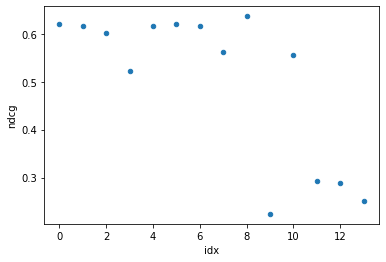

In [ ]:
ax1 = finalOut.plot.scatter(x='idx', y='ndcg', colormap='viridis')

In [ ]:
e1_trans= [colbert_e2e, BM25,TF_IDF,PL2,DirichletLM, pipe_BM25, pipe_colbert_bm25, colbert_prf_rerank, pipe_bm25_col, pipe_bm25_bo1prf, pipe_bm25_prf_colbert, bm25, mono_pipeline, duo_pipeline]
e1_names= ['ColBERT', 'BM25','TF_IDF', 'PL2', 'DirichletLM','bm25_tdidfpl2', 'COL_BM25', 'Colbert_prf_rank', 'BM25_Col', 'bo1_col', 'BM25_PRF_COLBERT',"BM25", "BM25 >> monoT5", "BM25 >> monoT5 >> duoT5"]
finalOut = experiment(e1_trans, e1_names)

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1042: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  kmn.fit(prf_embs)
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1042: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  kmn.fit(prf_embs)
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1042: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  kmn.fit(prf_embs)
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1042: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  kmn.fit(prf_embs)
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1042: ConvergenceWarning: Number of distinct 

monoT5:   0%|          | 0/233 [00:00<?, ?batches/s]

monoT5:   0%|          | 0/233 [00:00<?, ?batches/s]

duoT5:   0%|          | 0/93 [00:00<?, ?queries/s]

In [ ]:
finalOut['idx']=finalOut.index
finalOut

,name,map,ndcg,map +,map -,map p-value,ndcg +,ndcg -,ndcg p-value,idx
0,ColBERT,0.277335,0.616341,NaN,NaN,NaN,NaN,NaN,NaN,0
1,BM25,0.296517,0.621197,44.0,49.0,2.128855e-01,41.0,52.0,7.430935e-01,1
2,TF_IDF,0.290905,0.615367,45.0,48.0,3.327052e-01,40.0,53.0,9.433865e-01,2
3,PL2,0.276257,0.601166,42.0,51.0,9.458943e-01,38.0,55.0,3.301896e-01,3
4,DirichletLM,0.196005,0.523124,20.0,73.0,1.879007e-05,20.0,73.0,1.899675e-07,4
5,bm25_tdidfpl2,0.296517,0.621197,44.0,49.0,2.128855e-01,41.0,52.0,7.430935e-01,5
6,COL_BM25,0.277335,0.616341,0.0,0.0,NaN,0.0,0.0,NaN,6
7,Colbert_prf_rank,0.244879,0.562600,31.0,62.0,1.077322e-04,17.0,76.0,9.068324e-11,7
8,BM25_Col,0.297539,0.636442,44.0,49.0,1.893380e-01,47.0,46.0,1.589019e-01,8
9,bo1_col,0.008967,0.224320,0.0,93.0,3.925298e-25,0.0,93.0,4.536244e-39,9


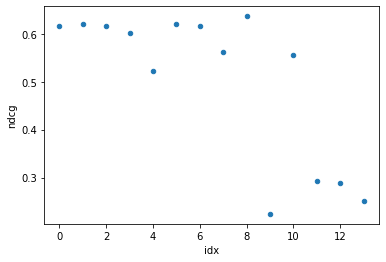

In [ ]:
ax1 = finalOut.plot.scatter(x='idx', y='ndcg', colormap='viridis')